In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn

import warnings
warnings.filterwarnings('ignore')

C:\Python\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Python\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Hi Professor, the dataset I used for Projects 1 and 2 wasn't appropriate for Project 3: with dependent variable battle-related deaths being continuous with a large amount of variance and a sparse distribution, I couldn't even perform a Stratified Split properly because there were certain cases that did not have more than 1 observation. In order to work with similar data for Project 3, I binned the variable "battle-related deaths" into four categories: none, low, medium, and high. I then created dummy variables for each, and have made 'high' my dependent variable. I have definitely slipped up a number of times in the process of converting 'battle-related deaths' from continuous to categorical, but even in my immediate experience between the two datasets, the binned categorical dependent variable of 'high' number of 'battle-related deaths' provides much more insight.

# Step 1

In [2]:
conflict = pd.read_csv("conflict_bins.csv")

In [3]:
print(conflict.dtypes)

Afghanistan             int64
Albania                 int64
Algeria                 int64
Angola                  int64
Argentina               int64
                        ...  
refugee_pop_byasylum    int64
low                     int64
medium                  int64
none                    int64
high                    int64
Length: 164, dtype: object


In [4]:
features = conflict.columns

In [5]:
conflictnp = conflict.to_numpy()

In [6]:
conflict.shape

(961, 164)

In [7]:
X = conflictnp[:, 0:163]

In [8]:
X.shape

(961, 163)

In [9]:
y = conflictnp[:, 163]

In [10]:
y.shape

(961,)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Step 2 PCA without and with scaled data

PCA without scaled data

In [13]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca1 = PCA(n_components=2)
# fit PCA model to data
pca1.fit(X_train)

# transform data onto the first two principal components
X_pca1 = pca1.transform(X_train)

NameError: name 'target_names' is not defined

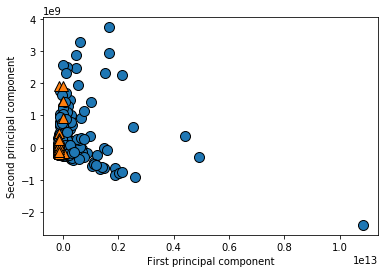

In [14]:
mglearn.discrete_scatter(X_pca1[:, 0], X_pca1[:, 1], y_train) 
plt.xlabel("First principal component") 
plt.ylabel("Second principal component")
plt.legend(target_names, loc="best")

There isn't a whole lot of separation on this two-dimensional scatter plot, but the data hasn't been whitened yet.

Text(0, 0.5, 'Principal components')

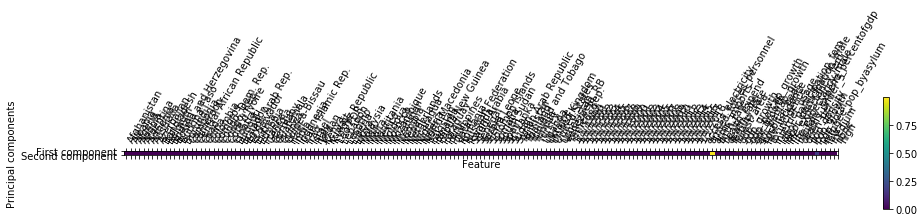

In [15]:
plt.matshow(pca1.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(features)),
           features, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

While the scale on the right-hand side is not easily interpretable, it does give us a relative understanding of the weights of the features by each of the two components. There is only one little chunk of yellow in the heat map above, but unfortunately, I can't see which feature it represents!

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

PCA with scaled data

Text(0, 0.5, 'Second principal component')

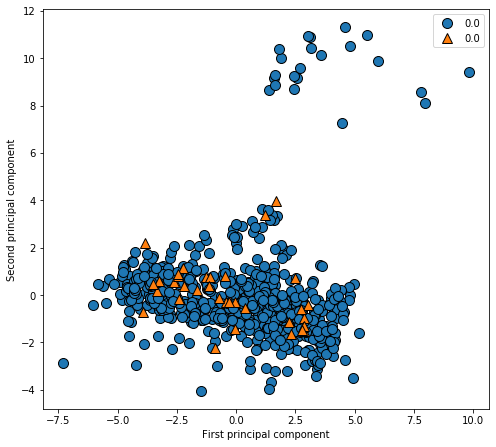

In [17]:
pca2 = PCA(n_components=2)
# fit PCA model to data
pca2.fit(X_scaled)

# transform data onto the first two principal components
X_pca2 = pca2.transform(X_scaled)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca2[:, 0], X_pca2[:, 1], y_train)
plt.legend(y_train, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

There's more separation of the points, which means there's less collinearity! Unfortunately, there's still a lot of overlap between cases.

Text(0, 0.5, 'Principal components')

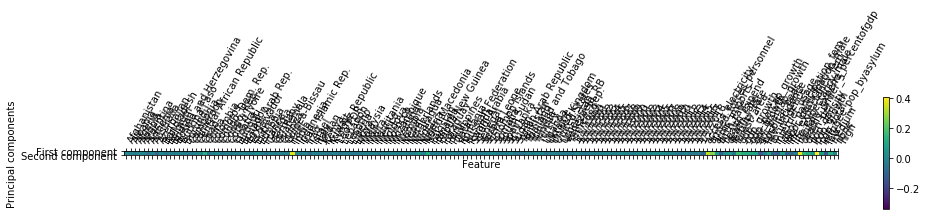

In [18]:
plt.matshow(pca2.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(features)),
           features, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

More colors! While there's still the same problem of not being able to read the actual features, this heat map has much more variation in the weights of the features between the first and second components.

In [19]:
# keep the first two principal components of the data
pca3 = PCA()
# fit PCA model to data
pca3.fit(X_scaled)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca3.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[4.79967841e-02 2.82917651e-02 2.20741311e-02 1.88372211e-02
 1.61378256e-02 1.51560264e-02 1.39314348e-02 1.35949065e-02
 1.29033237e-02 1.21730706e-02 1.19901313e-02 1.12284168e-02
 1.11115209e-02 1.07468654e-02 1.03726214e-02 1.00875415e-02
 9.92458876e-03 9.69432634e-03 9.55186421e-03 9.47621571e-03
 9.22373000e-03 8.98056423e-03 8.88986830e-03 8.80722888e-03
 8.73434431e-03 8.63149782e-03 8.53329745e-03 8.48480257e-03
 8.40534422e-03 8.37252576e-03 8.33529356e-03 8.21852591e-03
 8.17882156e-03 7.98913771e-03 7.94123435e-03 7.90647322e-03
 7.90424040e-03 7.80728225e-03 7.69310249e-03 7.65555550e-03
 7.54205291e-03 7.46709973e-03 7.43682419e-03 7.38511505e-03
 7.32692078e-03 7.27066997e-03 7.17262666e-03 7.06706968e-03
 7.05141083e-03 6.93053293e-03 6.89314943e-03 6.80780571e-03
 6.78215250e-03 6.71859461e-03 6.70693924e-03 6.66892955e-03
 6.64661928e-03 6.64114579e-03 6.62240558e-03 6.61462832e-03
 6.61203145e-03 6.60

In [20]:
pca4 = PCA(n_components=0.95)
# fit PCA model to data
pca4.fit(X_scaled)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca4.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.04799678 0.02829177 0.02207413 0.01883722 0.01613783 0.01515603
 0.01393143 0.01359491 0.01290332 0.01217307 0.01199013 0.01122842
 0.01111152 0.01074687 0.01037262 0.01008754 0.00992459 0.00969433
 0.00955186 0.00947622 0.00922373 0.00898056 0.00888987 0.00880723
 0.00873434 0.0086315  0.0085333  0.0084848  0.00840534 0.00837253
 0.00833529 0.00821853 0.00817882 0.00798914 0.00794123 0.00790647
 0.00790424 0.00780728 0.0076931  0.00765556 0.00754205 0.0074671
 0.00743682 0.00738512 0.00732692 0.00727067 0.00717263 0.00706707
 0.00705141 0.00693053 0.00689315 0.00680781 0.00678215 0.00671859
 0.00670694 0.00666893 0.00664662 0.00664115 0.00662241 0.00661463
 0.00661203 0.00660885 0.00659814 0.00658855 0.0065825  0.00657443
 0.00657164 0.00656508 0.00656177 0.0065599  0.00654831 0.00654567
 0.00654343 0.00653935 0.00653477 0.00653337 0.00652824 0.00652754
 0.0065254  0.00652454 0.0065213  0.0065208  0.0065191  0.0065170

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# keep the first two principal components of the data
pca4 = PCA(n_components=0.95)
# fit PCA model to data
pca4.fit(X_scaled)
# transform data onto the first ten principal components
X_pca4 = pca4.transform(X_scaled)
   
for train_index, test_index in split.split(X_scaled, y_train):
    X_train1 = X_pca4[train_index]
    X_test1 = X_pca4[test_index]
    y_train1 = y_train[train_index]
    y_test1 = y_train[test_index]
    
model=LogisticRegression().fit(X_train1, y_train1)

print("Accuracy on training set: {:.2f}".format(model.score(X_train1, y_train1)))
print("Accuracy on test set: {:.2f}".format(model.score(X_test1, y_test1)))

Accuracy on training set: 0.98
Accuracy on test set: 0.94


Wow! Definitely one of the best model scores I have achieved, in spite of the overfitting on the training set. I can't necessarily compare it to the models from Project 2, however, because I've changed datasets and model types (Project 2 worked with Linear Regression)